# Machine Learning Fundamentals

- ***Definition***: Machine Learning (ML) is a branch of Artificial Intelligence (AI) that focuses on enabling computers to emulate the way humans learn, to perform tasks autonomously, and to improve their performance and accuracy in making predictions through experience and exposure to more data. [IBM Definition](https://www.ibm.com/think/topics/machine-learning)

- According to [UC Berkeley](https://ischoolonline.berkeley.edu/blog/what-is-machine-learning/), Machine Learning algorithms are divided into three main components:
    - ***A Decision Process***: ML algorithms are used to make a prediction/classification. Based on some input data, which can either be labeled (supervised learning) or unlabeled (unsupervised learning), the algorithm will generate an estimate based on the pattern it learns in the data.

    - ***An Error Function***: This basically evaluates the predictions made by the model. If there are known examples, the error function can make a comparison to assess the performance of the model.

    - ***A Model Optimization Process***: This is ideally the process of adjusting model parameters, based on the performance of the model (model tuning). Adjusting parameters such as weights can help reduce the difference between the known example and the model prediction.

## Statistical Learning
- In statistical learning, we build models that compare the relationships between independent (features) and dependent (target) variables.

- However, the emphasis shifts from **statistical inference** to **prediction**

- When looking at prediction, consider important aspects such as ***model generalization***

### Inference vs Prediction
- An example of inference is:
    - **What is the relationship between X and y?**
- In inference the model should be statistically significant.

- An example of a prediction could be:
    - **How well can I use X to predict y?**
- In prediction, the model should be able to generalize to unseen data, implying that the overall model fit is more important.
- Unlike inference where we choose specific features for the model, in prediction we use all the available features that contribute significantly to the model.

## Linear Regression Model
- We will use the [**Boston Housing Data**](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) collected by the U.S Census Service, obtained from StatLib library, and maintained by Carnegie Mellon University to develop a Linear Regression model that will predict housing prices in the Boston area.

- Some of the key features in the dataset include:
    - **CRIM**: per capita crime rate by town
    - **ZN**: proportion of residential land zoned for lots over 25000 sq.ft.
    - **INDUS**: proportion of non-retail business acres per town
    - **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 othersise)
    - **NOX**: nitric oxide concentration (parts per 10 million)
    - **RM**: average number of rooms per dwelling
    - **AGE**: proportion of owner-occupied units built prior to 1940
    - **DIS**: weighted distances to five Boston employment centres
    - **RAD**: index of accessibility to radial highways
    - **TAX**: full-value property-tax rate per $10,000
    - **PIRATIO**: pupil-teacher ratio by town
    - **B**: 1000(Bk - 0.63)^2, where Bk is the proportion of blacks by town
    - **LSTAT**: % lower status of the population
    - **MEDV**: median value of owner-occupied homes in $1000's

First, we import the libraries we will implement in the modeling process.

In [12]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# add utility function
from data_utils import explore_dataframe

In [13]:
# load the boston housing dataset
boston = fetch_openml(name='boston', version=1)

# print the shape and features of the dataset
print(f'Shape of the dataset: {boston.data.shape}')
print(f'Feature names: {boston.feature_names}')

Shape of the dataset: (506, 13)
Feature names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


The dataset has a total of `506 records`, and `13 features`, excluding the target variable which is the price.

Next, we convert the data from an nd-array to a dataframe and we add the feature names to the dataframe.

In [14]:
# create a dataframe and add feature names
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


Next, we add the 'Price' column to the dataset to get an overall description of the dataset.

In [15]:
# add the 'Price' column to the dataframe
boston_df['Price'] = boston.target
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Using a user-defined function, we check the overall info of the dataframe.

In [16]:
# check the overall statistics of the dataframe
explore_dataframe(boston_df, 'Boston Housing Dataset')

Exploring Boston Housing Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
DataFrame info :
None

Descriptive statistics: 
              CRIM          ZN       INDUS CHAS         NOX          RM  \
count   506.000000  506.000000  506.000000  506  506.000000

## Model Validation
- This is a technique in ML that is used to evaluate how well a model generalizes to unseen data. It is also used to check for ***overfitting*** and ***underfitting*** of the model to the train data.

- In performing model validation:
    - Split the data into two parts, with an 80/20 split for example.
    - Use the larger portion of the split for training.
    - Usr the smaller portion for testing the model.

- Categories of model validation
    - ***Train-Test Split***: compares the model performance on training vs testing data using metrics such as **R-squared**, or an error-based metric such as **RMSE**. The data is divided into two main parts (training and testing). The model is trained on the train set & evaluated on the test set.
    If the metric is much better on the train dataset than on the test dataset, then the model is overfitting.

    - ***Cross-validation***: This refers to the splitting of data into multiple folds, and the model is trained & evaluated multiple times, each time implementing a different fold as the test set, and the remaining fold as the training set.
    The results of each training are averaged to give an estimate of the model performance.
    Cross-validation reduces **variance**(changes in model when using different portions of the train dataset) in the model performance, and helps detect overfitting more reliably than a train-test split.

**NB**: In some scenarios, a train-validation-test split is performed. This is mostly done when:
- There is enough data
- We are performing model selection and hyperparameter tuning (e.g adjusting no. of layers in Neural Networks)

### Overfitting vs Underfitting (Variance vs Bias)
#### Bias
- This is the error that happens when an ML model is too simple and fails to learn enough details from the data.

- In this scenario, the model is easier to train but it may not be able to capture underlying complexities of the data.

- High bias leads to **underfitting**, where the model performs poorly on both training and testing data because it fails to learn enough from the data.

#### Variance
- This is an error that happens when an ML model learns too much from the train data, including random noise.

- A high variance model learns not only the patterns, but also the noise in the training data, which leads to poor generalization on unseen data.

- High variance typically leads to **overfitting**, where the model performs well on training data, but poorly on unseen testing data.

- Generally, Overfitting results from **high variance and low bias**, while Underfitting results from **low variance and high bias**

## Model Generalization
- This is the ability of a trained model to accurately predictions on new, unseen data. [(rudderstack)](https://www.rudderstack.com/learn/machine-learning/generalization-in-machine-learning/)

- The main idea behind generalization is to equip the model with the ability to comprehend patterns within the training data, and apply them to previously unseen data, within the same distribution as the training set.

- When the model is made to memorize every detail of the train data, it will identify all the relevant patterns in the train data, but will perform poorly with the new unseen data.

- In this scenario, the model is not capable of generalization, or in other terms the model is overfitting the train data.


### Data Splitting
In this section, we will split the data into train and test datasets.

In [17]:
# define the feature (X) and target (y) variables
X = boston_df.drop(['Price', 'RAD', 'CHAS'], axis=1)
y = boston_df['Price']


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# display the shape of the training and testing sets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (404, 11)
Shape of y_train: (404,)
Shape of X_test: (102, 11)
Shape of y_test: (102,)


In [18]:
X_train.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.6140,5.304,97.3,2.1007,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.5380,5.834,56.5,4.4986,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.4379,6.031,23.3,6.6407,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.6140,6.103,85.1,2.0218,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.5380,5.727,69.5,3.7965,307.0,21.0,390.95,11.28
325,0.19186,0.0,7.38,0.4930,6.431,14.7,5.4159,287.0,19.6,393.68,5.08
335,0.03961,0.0,5.19,0.5150,6.037,34.5,5.9853,224.0,20.2,396.90,8.01
56,0.02055,85.0,0.74,0.4100,6.383,35.7,9.1876,313.0,17.3,396.90,5.77
437,15.17720,0.0,18.10,0.7400,6.152,100.0,1.9142,666.0,20.2,9.32,26.45
409,14.43830,0.0,18.10,0.5970,6.852,100.0,1.4655,666.0,20.2,179.36,19.78


#### **Regression vs Classification Metrics**
In regression, the most common metrics used include:
- ***RMSE (Root Mean Square Error)*** -> measures the average difference between a statistical model’s predicted values and the actual values. The lower the RMSE value, the better the model's capability to predict accurately.
- ***MAE (Mean Absolute Error)*** -> It measures the average absolute difference between the predicted values and the actual target values
- ***R_squared*** -> shows the proportion of the variation in the dependent variable that can be explained by the independent variables.

In classification, the most common metrics include: (covered at a later time)
- **Accuracy**
- **Recall**
- **F1 Score**
- **Precision**

Next, we instantiate the models we will implement for regression and fit the training data. In this project, we will implement three regression models: `Linear Regression, Decision Tree and XGBoost`

First, we will create a function that calculates different metrics to evaluate performance of the three models. The metrics we will use are:
- R_squared
- Mean_square_error
- Mean_absolute_error

In [24]:
# metric calculation function
def metrics_calculator(model, X_train, y_train, y_test, y_pred):
    """
    Function to calculate and display the metrics of the model
    """

    # calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error : {mse}')

    # calculate the root mean squared error
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error : {rmse}')

    # calculate the r-squared value
    r2 = r2_score(y_test, y_pred)
    print(f'R2 Score: {r2}')

    # calculate the mean absolute error
    mae = np.mean(np.abs(y_test - y_pred))
    print(f'Mean Absolute Error: {mae}')

    # cross validation score
    cvs = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    print(f'Cross Validation Score: {cvs}')


In this section, we now instantiate the three models, fit the training data and make predictions.

In [25]:
# instantiate Linear Regression model and fit the train data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# make predictions on test data
linear_pred = linear_model.predict(X_test)

# run the metrics calculator function
metrics_calculator(linear_model, X_train, y_train, y_test, linear_pred)

Mean Squared Error : 27.076445309750692
Root Mean Squared Error : 5.20350317668306
R2 Score: 0.630778010585436
Mean Absolute Error: 3.4099322060679356
Cross Validation Score: 0.7105404459302458


In [26]:
# instantiate the Decision Tree Regressor model and fit the train data
dec_model = DecisionTreeRegressor(random_state=42)
dec_model.fit(X_train, y_train)

# make predictions on test data
dec_pred = dec_model.predict(X_test)

# run the metrics calculator function
metrics_calculator(dec_model, X_train, y_train, y_test, dec_pred)

Mean Squared Error : 11.855196078431375
Root Mean Squared Error : 3.4431375340568917
R2 Score: 0.8383392269220116
Mean Absolute Error: 2.6382352941176475
Cross Validation Score: 0.5836826904577779


In [27]:
# instantiate the XGBoost Regressor model and fit the train data
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# make predictions on test data
xgb_pred = xgb_model.predict(X_test)

# run the metrics calculator function
metrics_calculator(xgb_model, X_train, y_train, y_test, xgb_pred)

Mean Squared Error : 7.334036858470754
Root Mean Squared Error : 2.7081426953672056
R2 Score: 0.899991019930923
Mean Absolute Error: 1.8899906289343738
Cross Validation Score: 0.8401868371216142


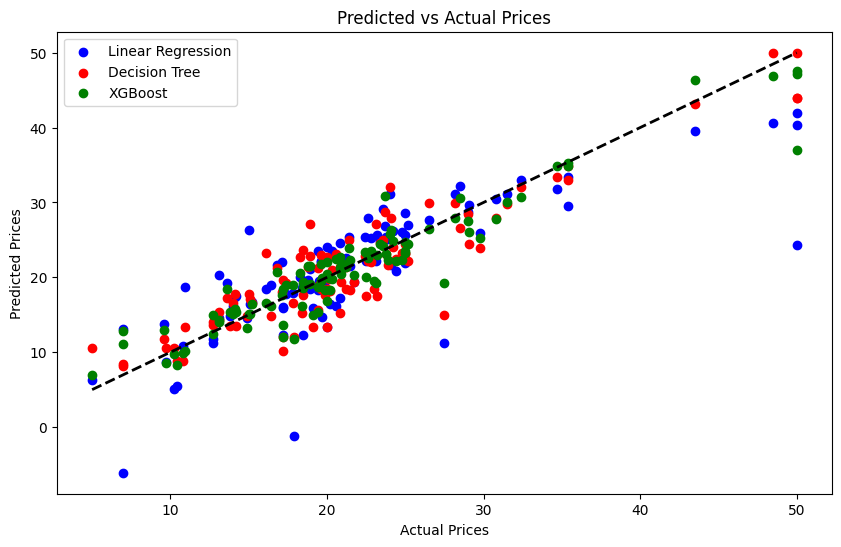

In [28]:
# plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, dec_pred, color='red', label='Decision Tree')
plt.scatter(y_test, xgb_pred, color='green', label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()